# ArcheWriting

Documentation process for the project started at the New Material Imaginaries class.

## Load Pandemic Archive of Voices Data

In [80]:
import requests
import json

r = requests.get('https://pandemic-archive-of-voices.herokuapp.com/api/data')

db_data = json.loads(r.text)

print(db_data)

{'db': 'The Pandemic Archive of Voices', 'extracted_on': '2021-01-2319:21:50', 'audios_length': 183, 'speakers_length': 24, 'total_duration_seconds': 314, 'audios': [{'from': 'Alberto Harres', 'file': 'db/audios/5631317686/audio_1@15-12-2020_14-57-52.wav', 'id': 13, 'text': 'Números', 'from_id': 5631317686, 'duration_seconds': 3, 'lang': {'name': 'brazilian portuguese', 'code': 'pt-br', 'standard': 'ISO 639-1'}}, {'from': 'nilya musaeva*️⃣', 'file': 'db/audios/4472772915/audio_2@15-12-2020_14-58-37.wav', 'id': 15, 'text': 'еда', 'from_id': 4472772915, 'duration_seconds': 1, 'lang': {'name': 'russian', 'code': 'ru', 'standard': 'ISO 639-1'}}, {'from': 'S. C.', 'file': 'db/audios/4408865338/audio_3@15-12-2020_16-21-06.wav', 'id': 22, 'text': '', 'from_id': 4408865338, 'duration_seconds': 3, 'lang': {'name': 'mandarin chinese', 'code': 'cmn', 'standard': 'ISO 639-3'}}, {'from': 'ruoxi', 'file': 'db/audios/5631317686/audio_4@15-12-2020_16-31-05.wav', 'id': 27, 'text': '怪迷日眼', 'from_id': 51

## Reading audio data

Process of transforming sound into text data.

First loading the audio file and transforming it into an int array.

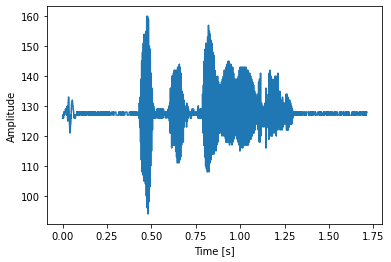

In [74]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

samplerate, data = wavfile.read('8bit/output.wav')

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

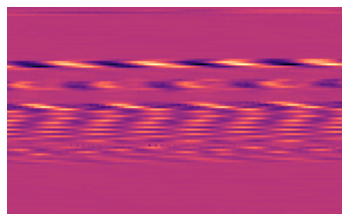

In [76]:
from matplotlib import colors
from matplotlib import figure
import math

fig = plt.figure(figsize = (6,6))

# find middle divisor of the array data
numbers = []
for i in range(1, len(data) + 1):
  if len(data) % i == 0:
    numbers.append(i)
divisor = numbers[math.ceil(len(numbers) / 2)]

# transform array data into a "rectangle"
grid_values = np.reshape(data, (-1, divisor))

plt.axis('off')
img = plt.imshow(grid_values, interpolation=None, cmap = 'magma')